In [2]:
import pandas as pd
import numpy as np
from tsne import bh_sne
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#the_data = pd.read_csv('s_big_data.csv')
red_data = pd.read_csv('the_data.csv')
the_data = red_data.sample(n=50000)

In [3]:
#from sklearn.decomposition import TruncatedSVD 
#from sklearn.preprocessing import normalize 

#svd = TruncatedSVD(algorithm='arpack', n_components=40)
#X = normalize(svd.fit_transform(red_data), norm='l1')

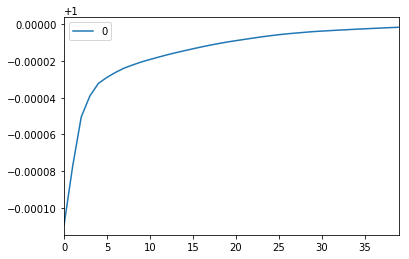

In [17]:
#pd.DataFrame(np.cumsum(svd.explained_variance_ratio_)).plot()

In [4]:
X = the_data

In [5]:
y = the_data.columns.values

In [6]:
X_2d = bh_sne(X)

In [ ]:
print X_2d

In [ ]:
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import time

cluster_range = list(range(2,10)) 
#Go through with different n_components to find the best silhouette score

for n_cluster in cluster_range:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_cluster, random_state=2).fit(X_2d)
    
    # Predict the cluster for each data point
    preds = clusterer.predict(X_2d)
      
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X_2d, preds)
    
    print "The score for n_cluster = {}. is : {}". format(n_cluster, score)

In [18]:
from sklearn.cluster import KMeans
n_clusters = 10
km = KMeans(n_clusters)
clusters = km.fit_predict(X_2d)
labels = km.labels_

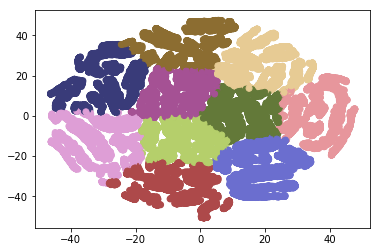

In [19]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap=plt.cm.get_cmap("Vega20b", 10))
#plt.scatter(result[:,0], result[:,1], c=labels, cmap=plt.cm.get_cmap("Vega20b", 10))